In [12]:
from package import process_dataset
from package import encoder
from package import models

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
description = pd.read_csv("data/dicionario.csv", encoding='latin-1')
train = pd.read_csv("data/dados_treino_hackaton.csv", encoding='latin-1', index_col=False)
test = pd.read_csv("data/dados_teste_x_hackaton.csv", encoding='latin-1', index_col=False)

del train['Unnamed: 0']
del test['Unnamed: 0']

In [14]:
train = encoder.encode_DataFrame(train)
train = process_dataset.processColumns(train)

In [15]:
train_cols, target = process_dataset.generate_labels(train)

In [16]:
X = process_dataset.scaleData(train[train_cols], useSaved=False)
y = train[target]

In [23]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13823)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin = LinearRegression()

In [58]:
lin.fit(X_train, y_train)

LinearRegression()

In [59]:
pred = lin.predict(X_test)

In [60]:
ypred = models.convertPredicted(pred)

models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        35
           1       0.68      0.63      0.65        27

    accuracy                           0.71        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.71      0.71      0.71        62

Accuracy score:  0.7096774193548387
Mean Squared Error:  0.2903225806451613
roc_auc score:  0.7005291005291007





In [61]:
import matplotlib.pyplot as plt

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [63]:
import ast

In [64]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75        35\n           1       0.68      0.63      0.65        27\n\n    accuracy                           0.71        62\n   macro avg       0.70      0.70      0.70        62\nweighted avg       0.71      0.71      0.71        62\n'

In [65]:
#ast.literal_eval(str(confusion_matrix(y_test, ypred)).replace(" ", ","))

In [66]:
fpr, tpr, _  = roc_curve(y_test,  pred)

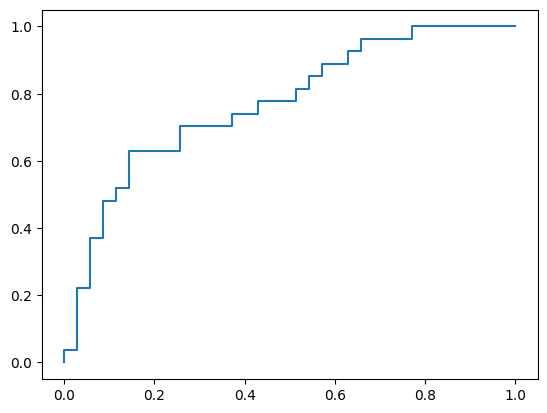

In [67]:
plt.plot(fpr,tpr)

## Decision tree regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
models.run_analysis(tree.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.62      0.59      0.60        27

    accuracy                           0.66        62
   macro avg       0.65      0.65      0.65        62
weighted avg       0.66      0.66      0.66        62

Accuracy score:  0.6612903225806451
Mean Squared Error:  0.3387096774193548
roc_auc score:  0.6534391534391535





## Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
ypred = models.convertPredicted(forest.predict(X_test))

In [74]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.72      0.67      0.69        27

    accuracy                           0.74        62
   macro avg       0.74      0.73      0.74        62
weighted avg       0.74      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.7333333333333333





## Testing polynomial regressor

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
p = PolynomialFeatures(degree = 3, include_bias=False)

In [77]:
pX_train = p.fit_transform(X_train)

In [78]:
lin = LinearRegression()
lin.fit(pX_train, y_train)

LinearRegression()

In [79]:
pred = lin.predict(p.transform(X_test))
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.52      0.49      0.50        35
           1       0.38      0.41      0.39        27

    accuracy                           0.45        62
   macro avg       0.45      0.45      0.45        62
weighted avg       0.46      0.45      0.45        62

Accuracy score:  0.45161290322580644
Mean Squared Error:  0.5483870967741935
roc_auc score:  0.4465608465608466





## SGD Regression

In [80]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.base import clone

In [81]:
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [82]:
minimal_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(6000):
    sgd.fit(X_train, y_train)
    y_val_pred = sgd.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    if val_error < minimal_error:
        minimal_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)


In [83]:
ypred = models.convertPredicted(sgd.predict(X_test))
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.71      0.63      0.67        27

    accuracy                           0.73        62
   macro avg       0.72      0.71      0.72        62
weighted avg       0.72      0.73      0.72        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.7148148148148149





## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log = LogisticRegression()

In [86]:
log.fit(X_train, y_train)

LogisticRegression()

In [87]:
ypred = log.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.67      0.67      0.67        27

    accuracy                           0.71        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.71      0.71      0.71        62

Accuracy score:  0.7096774193548387
Mean Squared Error:  0.2903225806451613
roc_auc score:  0.7047619047619048





## Support vector machines

In [88]:
from sklearn.svm import LinearSVC

In [89]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [90]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.71      0.63      0.67        27

    accuracy                           0.73        62
   macro avg       0.72      0.71      0.72        62
weighted avg       0.72      0.73      0.72        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.7148148148148149





In [91]:
from sklearn.svm import SVC

In [92]:
svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [93]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        35
           1       0.64      0.59      0.62        27

    accuracy                           0.68        62
   macro avg       0.67      0.67      0.67        62
weighted avg       0.68      0.68      0.68        62

Accuracy score:  0.6774193548387096
Mean Squared Error:  0.3225806451612903
roc_auc score:  0.6677248677248677





## Decision tree classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [96]:
ypred = tree.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        35
           1       0.71      0.44      0.55        27

    accuracy                           0.68        62
   macro avg       0.69      0.65      0.65        62
weighted avg       0.68      0.68      0.66        62

Accuracy score:  0.6774193548387096
Mean Squared Error:  0.3225806451612903
roc_auc score:  0.6507936507936508





In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [99]:
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [100]:
ypred = voting.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.70      0.78      0.74        27

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.76      0.76      0.76        62

Accuracy score:  0.7580645161290323
Mean Squared Error:  0.24193548387096775
roc_auc score:  0.7603174603174603





In [101]:
import xgboost

In [102]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.68      0.78      0.72        27

    accuracy                           0.74        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.75      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.746031746031746





In [104]:
xgb = xgboost.XGBClassifier(
        max_depth=2,
        gamma=0.1,
        eta=1.5,
        reg_alpha=1.1,
        reg_lambda=0.7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1.5,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.1, ...)

In [105]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        35
           1       0.62      0.78      0.69        27

    accuracy                           0.69        62
   macro avg       0.70      0.70      0.69        62
weighted avg       0.71      0.69      0.69        62

Accuracy score:  0.6935483870967742
Mean Squared Error:  0.3064516129032258
roc_auc score:  0.7031746031746031





In [106]:
from sklearn.metrics import accuracy_score
import xgboost

In [107]:
def run_XGB(X_train, X_test, y_train, y_test, max_depth=2, gamma=0.3, eta=0.5, reg_alpha=0.5, reg_lambda=0.7, prints=False):

    model = xgboost.XGBClassifier(
        max_depth=max_depth,
        gamma=gamma,
        eta=eta,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    
    return model, acc 

In [ ]:
lm = 0
for md in np.arange(1, 5):
    for gam in np.arange(0.1, 3, 0.2):
        for eta in np.arange(0.1, 2, 0.2):
            for ra in np.arange(0.1, 1.5, 0.2):
                for rl in np.arange(0.1, 1.5, 0.2):
                    _, r = run_XGB(X_train, X_test, y_train, y_test, md, gam, eta, ra, rl)
                    if r > lm:
                        lm = r
                        print("HIGHER ", lm)
                        print(md, gam, eta, ra, rl)
                        print("")

HIGHER  0.7419354838709677
1 0.1 0.1 0.1 0.1

HIGHER  0.7580645161290323
1 0.1 0.1 0.1 0.30000000000000004

HIGHER  0.7741935483870968
1 0.1 0.1 0.9000000000000001 0.1

HIGHER  0.7903225806451613
1 0.1 1.1000000000000003 1.3000000000000003 0.5000000000000001



# Fine Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [3, 7, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 7, 10, 12], 'max_features': [2, 3, 4, 8, 12, 15]},
]

In [61]:
forest = RandomForestRegressor()

In [62]:
grid = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, refit=True)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 7, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 8, 12, 15],
                          'n_estimators': [3, 7, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid.best_params_

{'max_features': 6, 'n_estimators': 20}

In [65]:
ypred = models.convertPredicted(grid.predict(X_test))

In [66]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        63
           1       0.69      0.57      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6642857142857143





## Importancia de colunas

In [68]:
sorted(zip(grid.best_estimator_.feature_importances_, train_cols))

[(0.007352370756300068, 'Produtos digitais'),
 (0.011183698020567599, 'Desdobramento de metas'),
 (0.014418867149368728, 'Processes Excellence'),
 (0.015982270336099787, 'n_solucoes'),
 (0.016747719144998983, 'Gestão da Receita_per_Gestão de Gastos'),
 (0.027593004968354252, 'Gestão da Operação'),
 (0.027860640436120594, 'numero_relacionamentos_convertidos'),
 (0.031658920749696236, 'Forma_de_Contratacao_Agregado'),
 (0.0353008932817207, 'numero_relacionamentos'),
 (0.036211275838360445, 'Faixa_de_Faturamento_Agregado'),
 (0.038508712551839866, 'Carteira_Nova'),
 (0.04317476382889312, 'Classificacao_da_Oportunidade'),
 (0.051019106282418236, 'Segmentacao'),
 (0.05411990942274823,
  'numero_relacionamentos_convertidos_per_numero_relacionamentos'),
 (0.055098638781501216, 'intervalo_tempo'),
 (0.056771482002475816, 'Segmento_Agregado2'),
 (0.06473088705900854, 'Total_HH'),
 (0.0648181169745398, 'Valor_corrigido2'),
 (0.0742810738893781, 'Data_Real_de_Encerramento_da_Opp2'),
 (0.086004655

## Using cross validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

In [73]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [74]:
display_scores(np.sqrt(-scores))

Scores:  [0.53881591 0.5819877  0.5819877  0.55809982 0.65286255 0.66529914
 0.57259833 0.52790958 0.6005462  0.6005462 ]
Mean:  0.5880653123548789
Std:  0.0421076487647239


In [75]:
models.run_analysis(cross_val_predict(tree, X, y, cv=10), y)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       326
           1       0.68      0.49      0.57       287

    accuracy                           0.65       613
   macro avg       0.66      0.64      0.64       613
weighted avg       0.66      0.65      0.64       613

Accuracy score:  0.6525285481239804
Mean Squared Error:  0.3474714518760196
roc_auc score:  0.6428838631068168



